In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as pltv
import gower
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [2]:
df = pd.read_pickle("../data/processed.pkl")
categorical_columns = df.select_dtypes(include=['category']).columns

In [3]:
# with open("../data/data_element_details.pkl", "rb") as file:
#     data_element_details = pickle.load(file)

In [4]:
# keep_cols = []
# for value in data_element_details.values():
#     if value['Section Name'] in ["Health Care Access", "Chronic Health Conditions"] and value['Label'] in df.columns:
#         keep_cols.append(value['Label'])
# df = df[keep_cols]

In [5]:
import pandas as pd
import prince

# Load the dataset
data = df

# Select the categorical columns for MCA
mca_columns = categorical_columns  # Replace with your categorical column names

# Create an instance of the MCA class
mca = prince.MCA(
    n_components=20,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit the MCA model to the data
mca.fit(data[mca_columns])

MCA(n_components=20, n_iter=3, random_state=42)

In [6]:
row_coords = mca.row_coordinates(df)

Attempt 0: k=12
silhouette_avg=0.1759930369500169
Attempt 1: k=13
silhouette_avg=0.16588590101987488
Attempt 2: k=14
silhouette_avg=0.20524492349645299
Attempt 3: k=15
silhouette_avg=0.16917697195764508
Attempt 4: k=16
silhouette_avg=0.16464382118550924
Attempt 5: k=17
silhouette_avg=0.19604487043449453
Attempt 6: k=18
silhouette_avg=0.18096821988914077
Attempt 7: k=19
silhouette_avg=0.17007446051787034
The optimal number of clusters based on Silhouette Score is 14


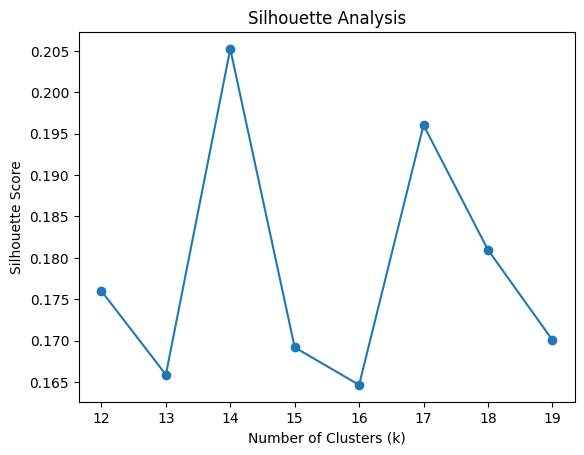

Cluster Labels (Optimal): [ 2  2  2 ... 10 11  9]
Cluster Centroids (Optimal): [[ 2.20223366e-01 -4.22804950e-02 -2.17758993e-02 -5.98604676e-03
   8.60333606e-03 -2.78712930e-02  7.10786041e-02  1.80139427e-02
  -1.60584798e-01 -1.26208649e-01  4.17032026e-02  6.86234458e-02
  -3.99441762e-02  6.88666533e-02  1.22557820e-02  4.02433707e-02
   7.51596965e-03  5.04376366e-03  1.43222653e-02  1.17013734e-02]
 [-3.31698015e-01  1.16252535e-01  2.61996099e-02  8.54671827e-04
   4.87518603e-02  2.13854038e-01  2.48962921e-02 -1.66192664e-01
   4.45030234e-01 -9.31585182e-02  2.08306984e-01 -2.29070742e-01
  -1.89999640e-01  4.10817097e-01  8.89075746e-02  4.15800722e-01
  -1.65906796e-01  1.87370379e-01 -3.05370980e-01 -5.42083436e-02]
 [-3.51161620e-01  3.55802763e-01  1.76506651e-01 -1.56464832e-02
   7.99975534e-02 -1.25284531e-01 -2.81035610e-02 -4.71668696e-02
  -5.62553239e-02  4.06267363e-02  3.59871154e-03  6.73447465e-02
  -2.65535316e-03 -2.06283649e-02 -5.14468932e-02  5.66484783

In [7]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Specify the range of k values to try
k_values = range(12, 20)

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Iterate over each k value
for i, k in enumerate(k_values):
    print(f"Attempt {i}: k={k}")
    # Create a MiniBatchKMeans object with the current k value
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
    
    # Fit the model to the MCA row coordinates
    mbk.fit(row_coords)
    
    # Get the cluster labels for each data point
    labels = mbk.labels_
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(row_coords, labels)
    print(f"silhouette_avg={silhouette_avg}")
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print("The optimal number of clusters based on Silhouette Score is", optimal_k)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Create a MiniBatchKMeans object with the optimal k value
mbk_optimal = MiniBatchKMeans(n_clusters=optimal_k, batch_size=100, random_state=42)

# Fit the model to the MCA row coordinates
mbk_optimal.fit(row_coords)

# Get the cluster labels for each data point
labels_optimal = mbk_optimal.labels_

# Get the cluster centers
centroids_optimal = mbk_optimal.cluster_centers_

# Print the cluster labels and centroids for the optimal clustering
print("Cluster Labels (Optimal):", labels_optimal)
print("Cluster Centroids (Optimal):", centroids_optimal)

In [8]:
with open('../data/silhouette_scores_2.pickle', 'wb') as handle:
    pickle.dump(silhouette_scores, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/mbk_optimal_2.pickle', 'wb') as handle:
    pickle.dump(mbk_optimal, handle, protocol=pickle.HIGHEST_PROTOCOL)